In [28]:
import numpy as np
import pandas as pd
data = pd.read_csv("heart.csv")
X = data.iloc[: , 0:-1]
y = data.iloc[: , -1: ]
# print(y)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
# print(y_train)
model.fit(X_train, y_train['target'])
# print(np.array(y_train.values))
# print(y_train['target'])


LogisticRegression(solver='liblinear')

d:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


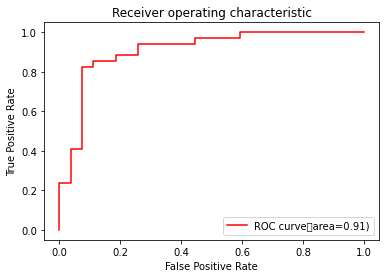

In [29]:
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt

# y_score=model.predict(X_test)
y_score=model.predict_proba(X_test)[:,1]
# print(y_score)
fpr,tpr,_=roc_curve(y_test,y_score)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='red',label='ROC curve（area=%0.2f)'%roc_auc)
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Receiver operating characteristic')  
plt.legend(loc="lower right")  
plt.show()  
  


In [30]:
from sklearn.metrics import precision_recall_curve


precision,recall,_=precision_recall_curve(y_test,y_score)
print('Precision: ', np.mean(precision))  #查准率，出结果后，预测的结果是否准确
print('Recall: ', np.mean(recall))#查全率，出结果前，有多大概率预测正确


Precision:  0.8771093932748503
Recall:  0.6084198385236448
